# BANK MARKETING

# 1. EXPLORATORY DATA ANALYSIS

## 1.1 Preliminary operations:

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from collections import OrderedDict
import matplotlib.pyplot as plt 
from pandas.api.types import CategoricalDtype

In [2]:
data=pd.read_csv('BankMarketing.csv',sep=';')
data

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,34579,35,admin.,single,university.degree,no,yes,no,cellular,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
1,446,42,technician,married,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,20173,36,admin.,married,university.degree,no,no,no,cellular,aug,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
3,18171,37,admin.,married,high.school,no,yes,yes,telephone,jul,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
4,30128,31,management,single,university.degree,no,yes,no,cellular,apr,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,28870,45,blue-collar,married,unknown,no,yes,no,cellular,apr,...,1,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,yes
9276,30452,60,admin.,married,university.degree,no,yes,no,cellular,may,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,yes
9277,28937,38,blue-collar,married,basic.9y,no,yes,no,cellular,apr,...,1,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
9278,16739,41,technician,single,university.degree,no,no,no,cellular,jul,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


The dataset contains information of clients coming from a marketing campaign for a banking product. It has the following characteristics:

In [3]:
print('Dataset dimension:',*data.shape)

Dataset dimension: 9280 21


### 1.1.1 Variables type setting:

In [6]:
data.dtypes

ID                  int64
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

The categorical variables are wrongly read by Python.

In [7]:
cat=list(dict(data.dtypes[data.dtypes=='object']).keys())

for i in cat: 
    data[i]=data[i].astype('category')

data.dtypes

ID                   int64
age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

### 1.1.2 Check the presence of NA's:

In [8]:
data.isnull().sum()

ID                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## 1.2 Variables analysis

Through the analysis of the dataset it is possible to cluster the variables into four groups:
- *Client's information*
- *Socio-economic indeces*
- *Previous campaign information*
- *Current campaign information*



Each variable will be evaluated individually and in relation to the response variable. 

### 1.2.1 Client's information

#### ID:

In [9]:
data.ID.value_counts().head()

3849     4
25293    3
15104    3
13401    3
31077    3
Name: ID, dtype: int64

The ID usually allows to identify unique clients. In this case there are repetitions of ID inside the dataset.
Are these different records of the same client? Or only a duplication of the same record?

In [11]:
data.drop_duplicates(inplace=True)
data.ID.value_counts().head()

4264     1
30020    1
27983    1
11085    1
32077    1
Name: ID, dtype: int64

By using the function `drop_duplicates`, it is possible to see that the ID's repetitions were just duplicates.

#### Target

Being sure to not have repetition in the observations, it is possible to analyse the target variable:

The target variable is "y":
  index  Percentage
0   yes   51.670379
1    no   48.329621


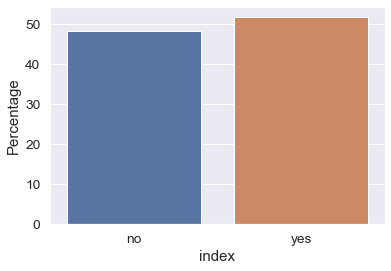

In [12]:
print('The target variable is "y":')

palette ={"yes":"C1","no":"C0"}

target = (data['y'].value_counts(normalize=True)
                     .rename('Percentage')
                     .mul(100)
                     .reset_index())
print(target)
sns.set_style("whitegrid")
sns.set(font_scale = 1.25)
sns.barplot(x='index',y='Percentage',data=target,palette=palette)

plt.show()

The response variable is equally distributed among the two modalities

#### Age

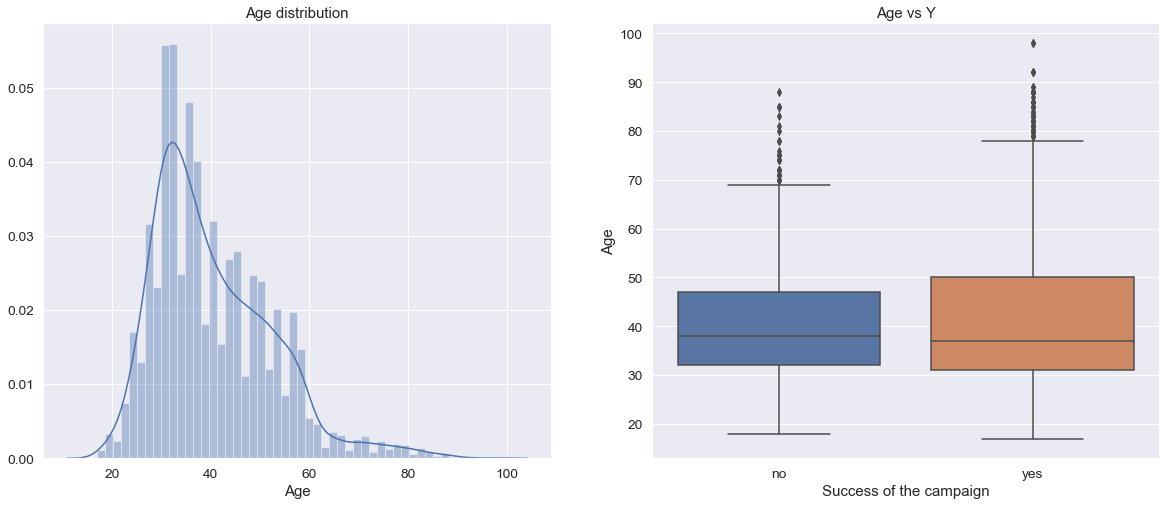

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
sns.boxplot(x='y',y='age',data=data,ax=ax2,palette=palette)
ax2.set_xlabel('Success of the campaign')
ax2.set_ylabel('Age')
ax2.set_title('Age vs Y')


sns.distplot(data['age'],ax=ax1)
ax1.set_xlabel('Age')
ax1.set_ylabel('')
ax1.set_title('Age distribution')

plt.show()

The age distribution is concentrated in the range 30-50. The age seems not to be a discriminant in the success of the campaign.

#### Job

            index  Perc.%
0          admin.   27.62
1     blue-collar   18.52
2      technician   15.92
3        services    8.42
4      management    7.05
5         retired    6.34
6         student    3.63
7   self-employed    3.41
8    entrepreneur    3.13
9      unemployed    2.62
10      housemaid    2.52
11        unknown    0.84


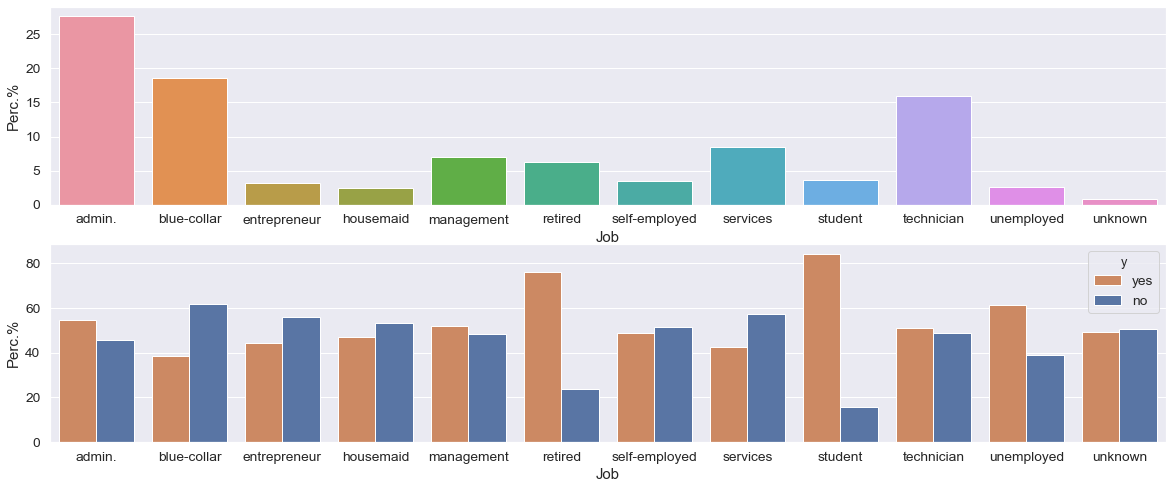

In [15]:
target = (data['job'].value_counts(normalize=True)
                     .rename('Perc.%')
                     .mul(100)
                     .reset_index())
print(round(target,2))

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (20,8))

sns.set(font_scale = 1.25)
a=sns.barplot(x='index',y='Perc.%',data=target,ax=ax1)
a.set(xlabel='Job')


job_y = (data.groupby(['job'])['y']
         .value_counts(normalize=True)
         .rename('Perc.%')
         .mul(100)
         .reset_index())

sns.barplot(x="job", y="Perc.%", hue="y", data=job_y,ax=ax2,palette=palette)
plt.xlabel('Job')

plt.show()

The distribution of job is irregular: administrator, blue-collar and technician are the most present modalities.<br>
Regarding the success of the campaign, the client's job seems to influence the bought of the banking product.<br>
There is also a particular category: unknown. 




#### Marital

      index  Perc.%
0   married   58.07
1    single   31.08
2  divorced   10.61
3   unknown    0.23


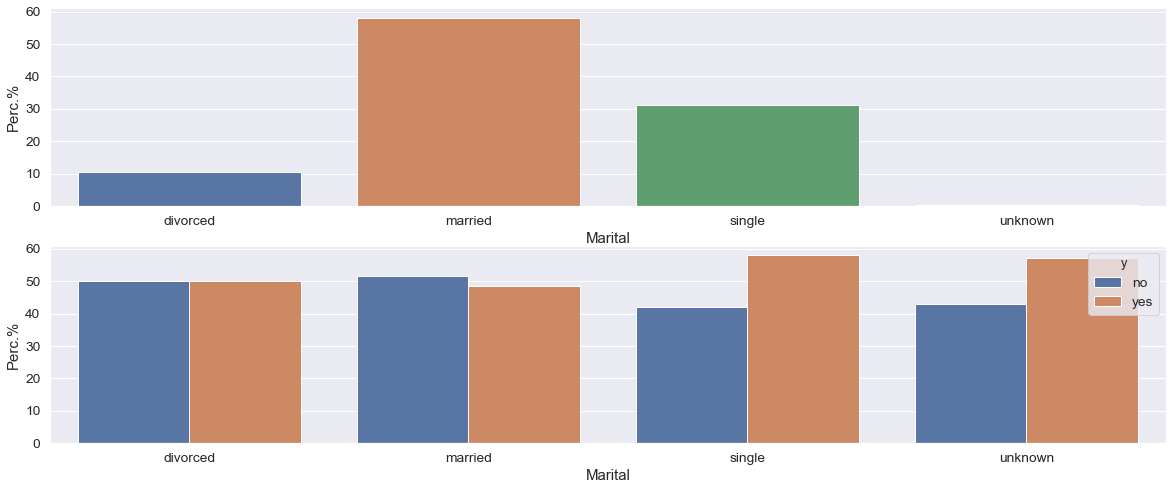

In [16]:
marital = (data['marital'].value_counts(normalize=True)
                     .rename('Perc.%')
                     .mul(100)
                     .reset_index())
print(round(marital,2))

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (20,8))

sns.set(font_scale = 1.25)
a=sns.barplot(x='index',y='Perc.%',data=marital,ax=ax1)
a.set(xlabel='Marital')


marital_y = (data.groupby(['marital'])['y']
         .value_counts(normalize=True)
         .rename('Perc.%')
         .mul(100)
         .reset_index())

sns.barplot(x="marital", y="Perc.%", hue="y", data=marital_y,ax=ax2,palette=palette)
plt.xlabel('Marital')

plt.show()

At first glimpse, married appears to be the most relevant modality in "marital" variable. <br>
There is still the presence of the modality unknown but they are exiguous. <br>
Marital doesn't influence the success of the campaign, unless for the 'single' status.

#### Education


                 index  Perc.%
0    university.degree   32.75
1          high.school   22.80
2  professional.course   12.54
3             basic.9y   12.45
4             basic.4y    9.96
5              unknown    4.73
6             basic.6y    4.71
7           illiterate    0.07


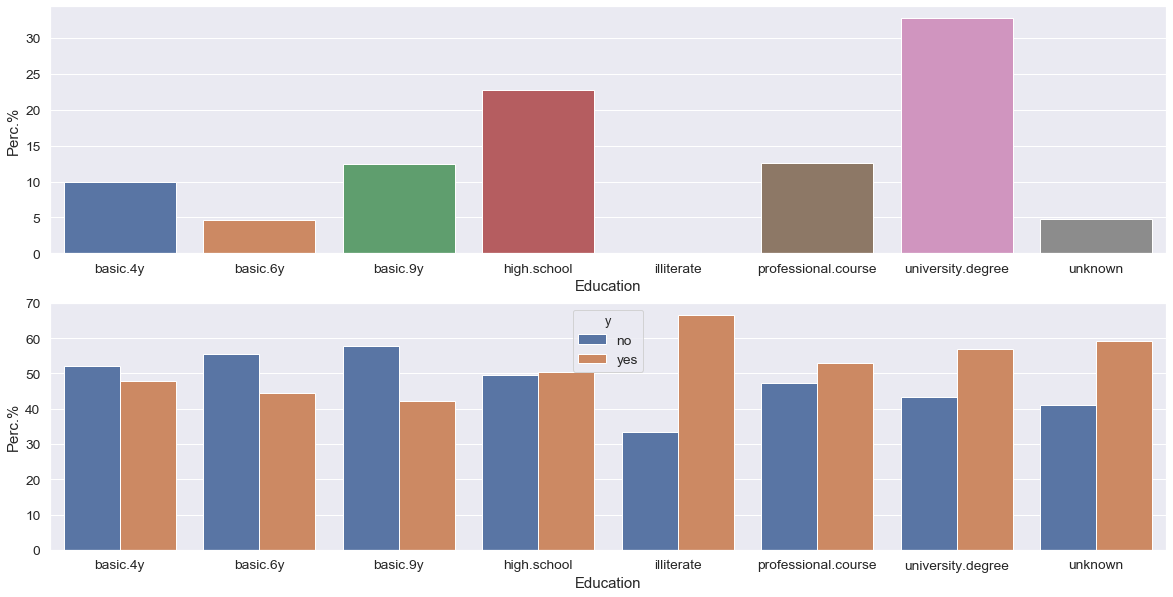

In [17]:
education= (data['education'].value_counts(normalize=True)
                     .rename('Perc.%')
                     .mul(100)
                     .reset_index())
print(round(education,2))

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (20,10))

sns.set(font_scale = 1.25)
a=sns.barplot(x='index',y='Perc.%',data=education,ax=ax1)
a.set(xlabel='Education')


education_y = (data.groupby(['education'])['y']
         .value_counts(normalize=True)
         .rename('Perc.%')
         .mul(100)
         .reset_index())

sns.barplot(x="education", y="Perc.%", hue="y", data=education_y,ax=ax2,palette=palette)
plt.xlabel('Education')

plt.show()

People with higher level of education have a more significant presence. <br>
There are also unknown. <br>
These variable display a conflicting pattern with the response variable: illiterate people and higher-level-educated people are more willing to buy the bank product. <b>


#### Default 

     index  Perc.%
0       no   83.93
1  unknown   16.07


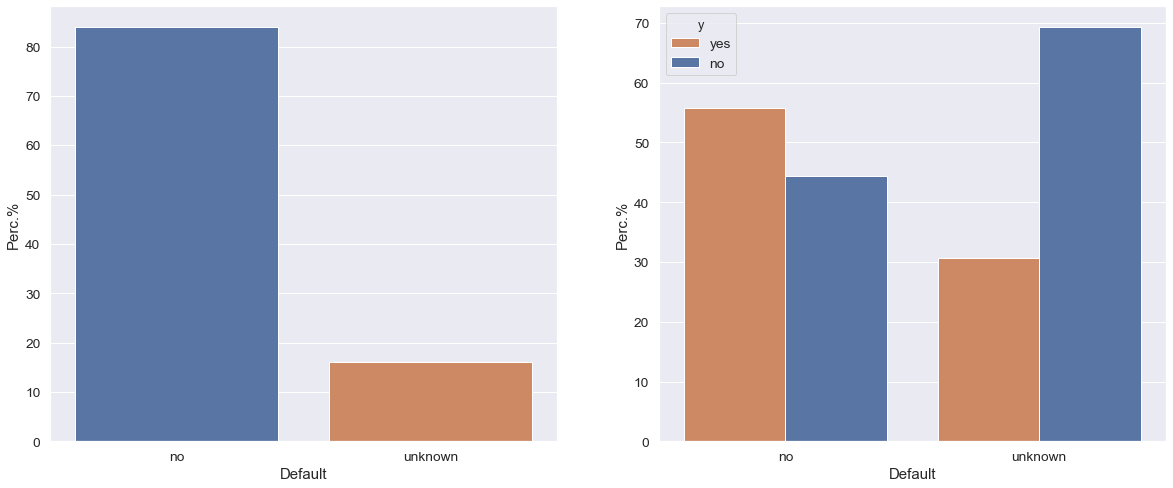

In [18]:
default= (data['default'].value_counts(normalize=True)
                     .rename('Perc.%')
                     .mul(100)
                     .reset_index())
print(round(default,2))

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

sns.set(font_scale = 1.25)
a=sns.barplot(x='index',y='Perc.%',data=default,ax=ax1)
a.set(xlabel='Default')


default_y = (data.groupby(['default'])['y']
         .value_counts(normalize=True)
         .rename('Perc.%')
         .mul(100)
         .reset_index())

sns.barplot(x="default", y="Perc.%", hue="y", data=default_y,ax=ax2,palette=palette)
plt.xlabel('Default')

plt.show()

Unexpectedly, it is absent the modality yes, so people who have experienced default. <br>
But it is recorded the modality unknown. It is unusual for a bank to have no data on defaulted clients.

#### Loan

     index  Perc.%
0       no   82.86
1      yes   14.81
2  unknown    2.33


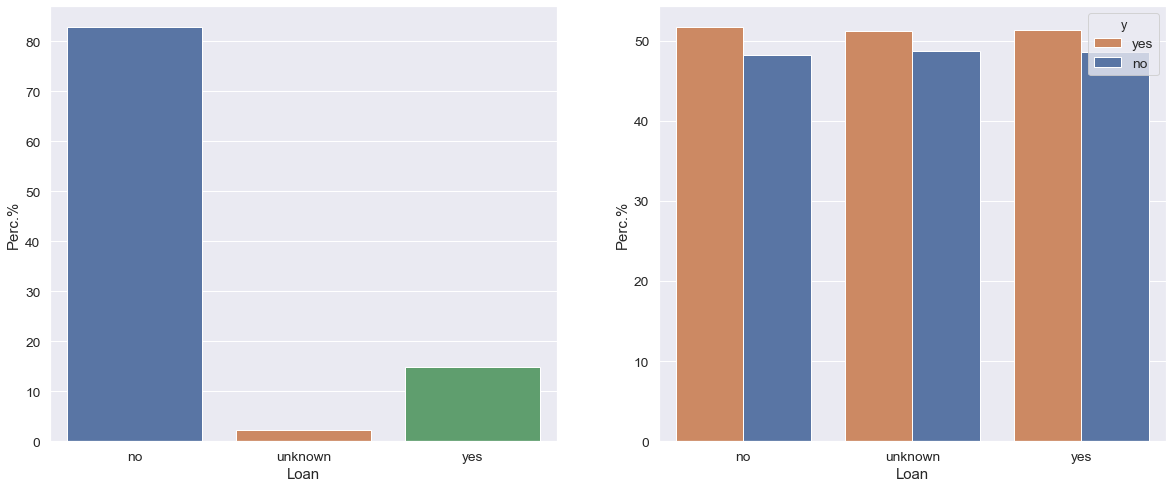

In [19]:
loan = (data['loan'].value_counts(normalize=True)
                     .rename('Perc.%')
                     .mul(100)
                     .reset_index())
print(round(loan,2))

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

sns.set(font_scale = 1.25)
a=sns.barplot(x='index',y='Perc.%',data=loan,ax=ax1)
a.set(xlabel='Loan')


loan_y = (data.groupby(['loan'])['y']
         .value_counts(normalize=True)
         .rename('Perc.%')
         .mul(100)
         .reset_index())

sns.barplot(x="loan", y="Perc.%", hue="y", data=loan_y,ax=ax2,palette=palette)
plt.xlabel('Loan')

plt.show()

The first plot shows a low percentage of unknown in the Loan variable and a prevalence of 'no'. <br>
Instead, from the second histogram, it can be witnessed the absence of a significant influence on the target outcome.

#### Housing

     index  Perc.%
0      yes   53.21
1       no   44.47
2  unknown    2.33


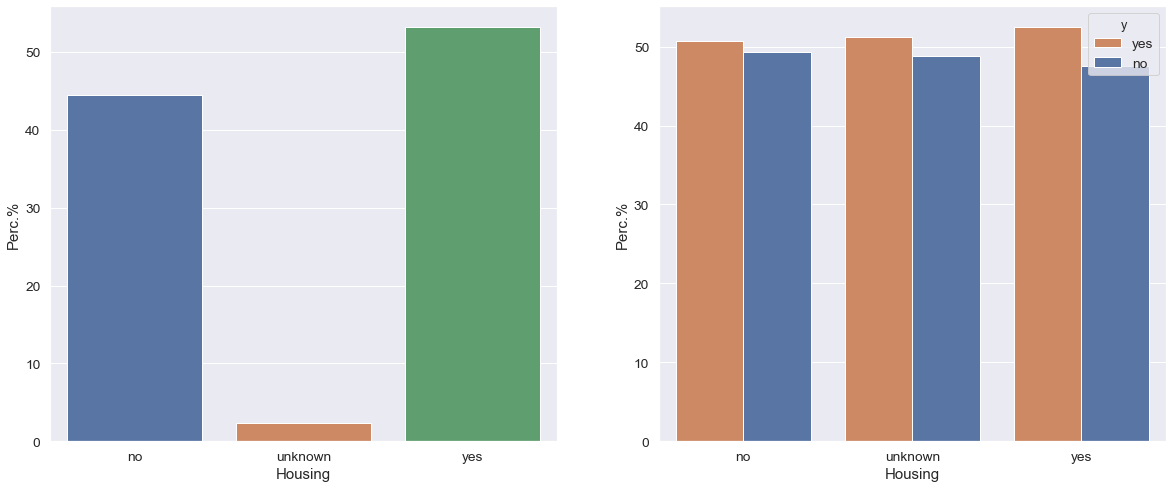

In [20]:
housing = (data['housing'].value_counts(normalize=True)
                     .rename('Perc.%')
                     .mul(100)
                     .reset_index())
print(round(housing,2))

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

sns.set(font_scale = 1.25)
a=sns.barplot(x='index',y='Perc.%',data=housing,ax=ax1)
a.set(xlabel='Housing')


housing_y = (data.groupby(['housing'])['y']
         .value_counts(normalize=True)
         .rename('Perc.%')
         .mul(100)
         .reset_index())

sns.barplot(x="housing", y="Perc.%", hue="y", data=housing_y,ax=ax2,palette=palette)
plt.xlabel('Housing')

plt.show()

The first plot shows a low percentage of unknown in the Housing variable and a prevalence of 'yes'. <br>
Instead,the second histogram, it can be witnessed the absence of a significant influence on the target outcome.

### 1.2.2 Socio-economical variables:

#### Euribor index


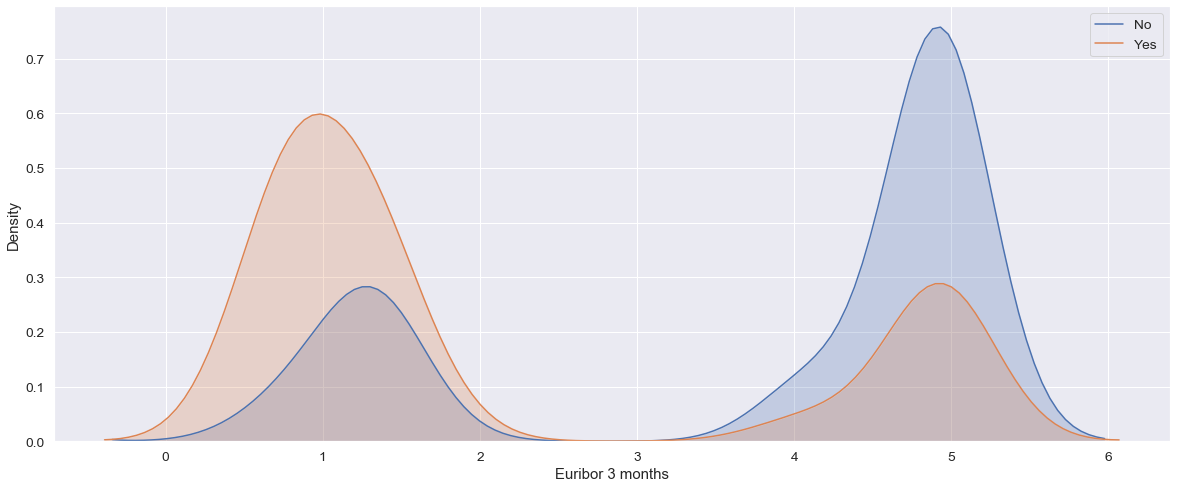

In [21]:
fig=plt.subplots(figsize=(20,8))
sns.kdeplot(data[data['y']=='no']['euribor3m'],shade=True,label='No')
sns.kdeplot(data[data['y']=='yes']['euribor3m'],shade=True,label='Yes')
plt.xlabel('Euribor 3 months')
plt.ylabel('Density')
plt.show()

There is a striking conflicting relationship between 3-month euribor rate and the target y. <br>
From a financial perspective, it is expected that when euribor has a positive increasing trend, bank clients are more willing to purchase bank product in order to benefit a higher amount at expiration date.  

#### Consumption price index

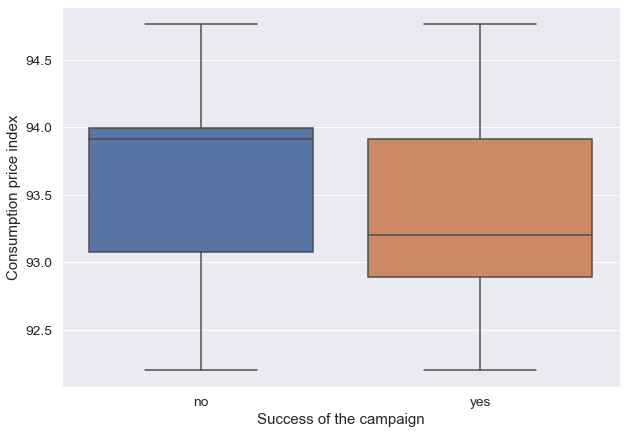

In [22]:
fig=plt.subplots(figsize=(10,7))
a=sns.boxplot(x='y',y='cons.price.idx',data=data)
a.set_xlabel('Success of the campaign')
a.set_ylabel('Consumption price index')
plt.show()

In absolute terms, there is a negligible influence on the response variable but the distribution of `cons.price.idx` is very different conditionated to the success of the campaign.

#### Variation employment rate 


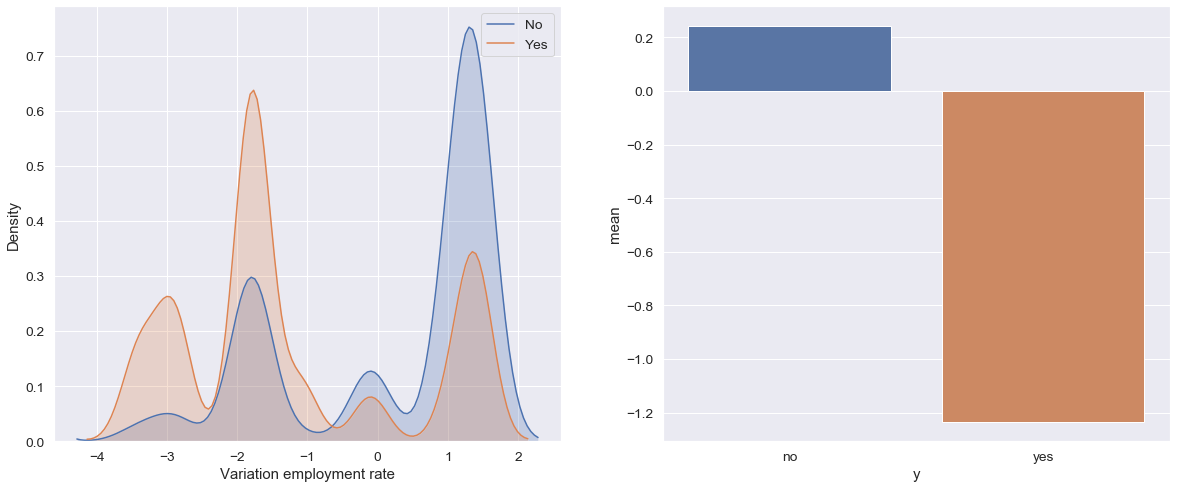

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
a=sns.kdeplot(data[data['y']=='no']['emp.var.rate'],shade=True,label='No',ax=ax1)
sns.kdeplot(data[data['y']=='yes']['emp.var.rate'],shade=True,label='Yes',ax=ax1)
a.set_xlabel('Variation employment rate')
a.set_ylabel('Density')

a=data.groupby('y')['emp.var.rate'].mean().rename('mean').reset_index()
sns.barplot(x='y',y='mean',data=a,ax=ax2)

plt.show()


When the people decide not to buy baninkg products it is more probable that the variation of the rate is positive (and viceversa). 

#### Number of employed

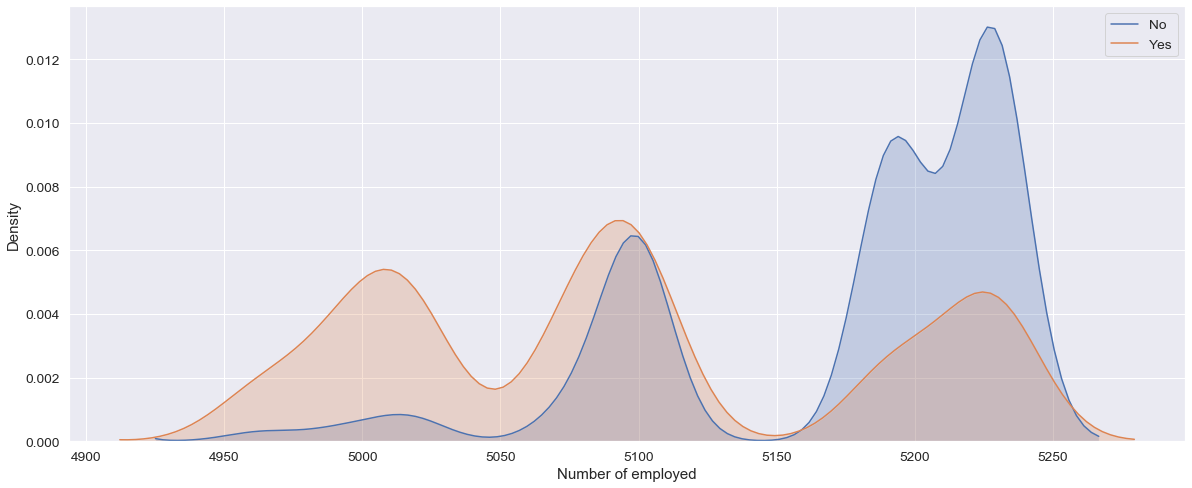

In [24]:
fig=plt.subplots(figsize=(20,8))
sns.kdeplot(data[data['y']=='no']['nr.employed'],shade=True,label='No')
sns.kdeplot(data[data['y']=='yes']['nr.employed'],shade=True,label='Yes')
plt.xlabel('Number of employed')
plt.ylabel('Density')
plt.show()

This variable seems to have a negative relation with the response. <br>
We are not sure what is the context of `nr.employed` (e.g employed in the bank, employed in the country..)

### 1.2.3 Previous campaign information

#### Previous

   index  Perc.%
0      0   77.46
1      1   15.98
2      2    4.39
3      3    1.50
4      4    0.47
5      5    0.16
6      6    0.04


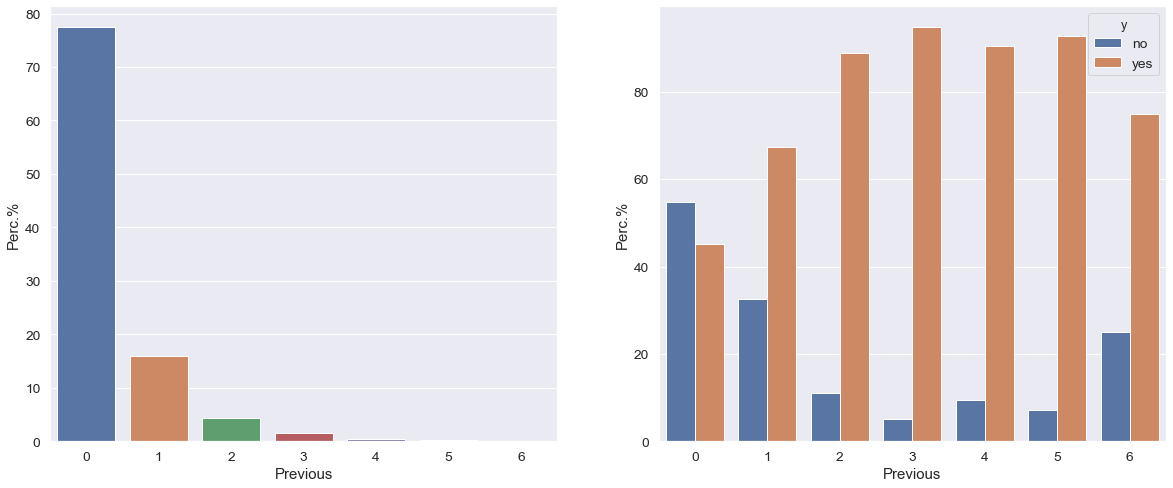

In [25]:
previous= (data['previous'].value_counts(normalize=True)
                     .rename('Perc.%')
                     .mul(100)
                     .reset_index())
print(round(previous,2))

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

sns.set(font_scale = 1.25)
a=sns.barplot(x='index',y='Perc.%',data=previous,ax=ax1)
a.set(xlabel='Previous')


previous_y = (data.groupby(['previous'])['y']
         .value_counts(normalize=True)
         .rename('Perc.%')
         .mul(100)
         .reset_index())

sns.barplot(x="previous", y="Perc.%", hue="y", data=previous_y,ax=ax2)
plt.xlabel('Previous')

plt.show()

There is a strong presence of zeroes in this variable.<br>
From the right-hand plot, many people that bought banking products has higher values of `previous`.<br>
We suppose that this variable could be the number of campaigns in which the client was previously involved or the number of contacts during previous campaigns.

#### Poutcome

         index  Perc.%
0  nonexistent   77.46
1      failure   11.97
2      success   10.57


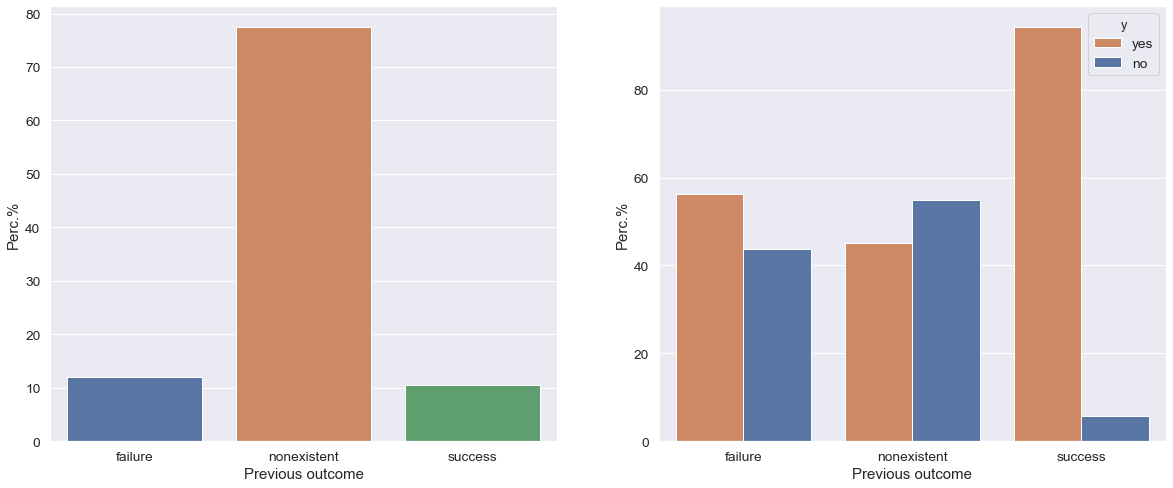

In [26]:
poutcome= (data['poutcome'].value_counts(normalize=True)
                     .rename('Perc.%')
                     .mul(100)
                     .reset_index())
print(round(poutcome,2))

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

sns.set(font_scale = 1.25)
a=sns.barplot(x='index',y='Perc.%',data=poutcome,ax=ax1)
a.set(xlabel='Previous outcome')


poutcome_y = (data.groupby(['poutcome'])['y']
         .value_counts(normalize=True)
         .rename('Perc.%')
         .mul(100)
         .reset_index())

sns.barplot(x="poutcome", y="Perc.%", hue="y", data=poutcome_y,ax=ax2,palette=palette)
plt.xlabel('Previous outcome')

plt.show()

It is possible to notice three things:
- nonexistent: in this campaign, the majority of the potential customers was not present in the last campagin
- customers that bought previously tend to buy again
- despite the effort to engage new potential customers, the effect of the current campaign is not so relevant(have a look 'nonexistent' in the right-hand plot) 

#### Pdays

    index  Perc.%
0     999   88.54
1       3    3.49
2       6    3.32
3       4    0.85
4       7    0.47
5       2    0.45
6       9    0.42
7      10    0.37
8       5    0.35
9      12    0.32
10     13    0.31
11     15    0.19
12     11    0.17
13      8    0.14
14     14    0.13
15      0    0.13
16      1    0.10
17     16    0.08
18     18    0.04
19     17    0.03
20     22    0.03
21     21    0.02
22     19    0.01
23     27    0.01
24     26    0.01
25     25    0.01


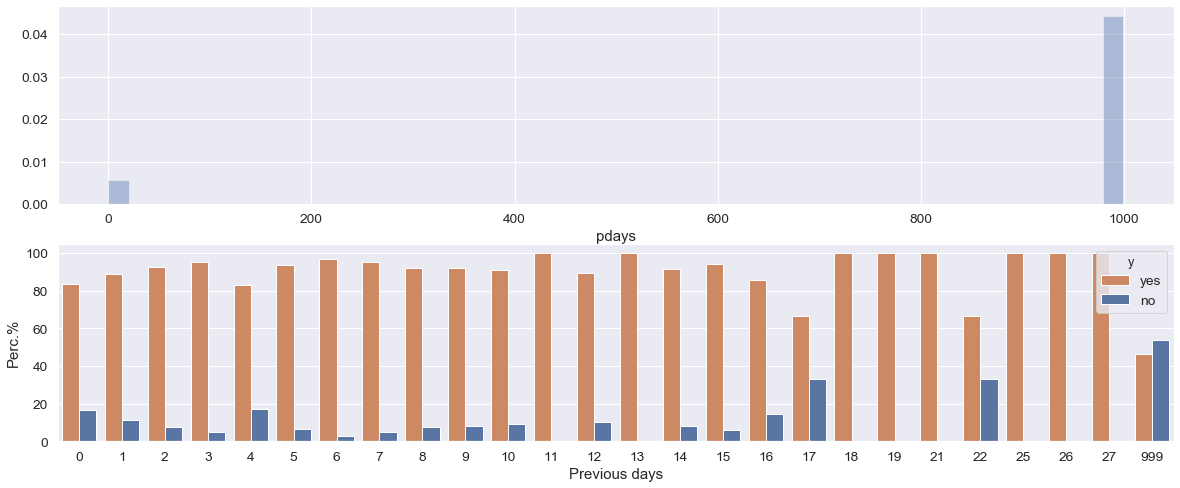

In [27]:
pd= (data['pdays'].value_counts(normalize=True)
                     .rename('Perc.%')
                     .mul(100)
                     .reset_index())
print(round(pd,2))

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (20,8))

sns.distplot(data['pdays'],hist=True,kde=False,rug=False,hist_kws={"density":True},ax=ax1)

pd_y = (data.groupby(['pdays'])['y']
         .value_counts(normalize=True)
         .rename('Perc.%')
         .mul(100)
         .reset_index())

sns.barplot(x="pdays", y="Perc.%", hue="y", data=pd_y,ax=ax2,palette=palette)
plt.xlabel('Previous days')

plt.show()

The distribution shows that the 80% of people has 999 as value of the variable `pdays`.<br>
By observing the second plot, you can see that these people are almost balanced between 'yes' and 'no'.<br>
For other possible values of the variable the positive answer of y are always higher than the negative. <br>
We suppose that `pdays` could be the number of days passed from the last contact of a previous campaign in which the client was involved. 

### 1.2.4 Current campaign information

#### Month 

  index  Perc.%
0   may   26.93
1   jul   15.59
2   aug   14.53
3   jun   12.68
4   nov    9.48
5   apr    8.89
6   oct    4.15
7   mar    3.42
8   sep    3.24
9   dec    1.09


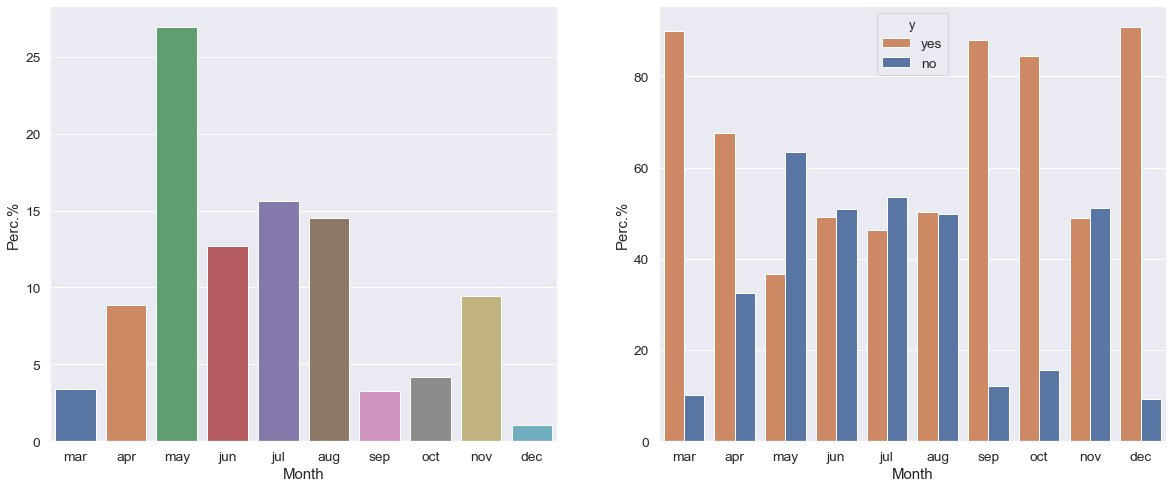

In [28]:
MonthLabels = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
M_catType = CategoricalDtype(categories = MonthLabels, ordered = True)
data['month']= data['month'].astype(M_catType)


month= (data['month'].value_counts(normalize=True)
                     .rename('Perc.%')
                     .mul(100)
                     .reset_index())
print(round(month,2))

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

sns.set(font_scale = 1.25)
a=sns.barplot(x='index',y='Perc.%',data=month,ax=ax1)
a.set(xlabel='Month')


month_y = (data.groupby(['month'])['y']
         .value_counts(normalize=True)
         .rename('Perc.%')
         .mul(100)
         .reset_index())

sns.barplot(x="month", y="Perc.%", hue="y", data=month_y,ax=ax2,palette=palette)
plt.xlabel('Month')

plt.show()

The months from April to August are when most contacts were made, but also when less products are sold. It is possible to see that the other months were more profitable.

#### Day of week

  index  Perc.%
0   thu   21.58
1   tue   20.49
2   wed   19.88
3   mon   19.59
4   fri   18.46


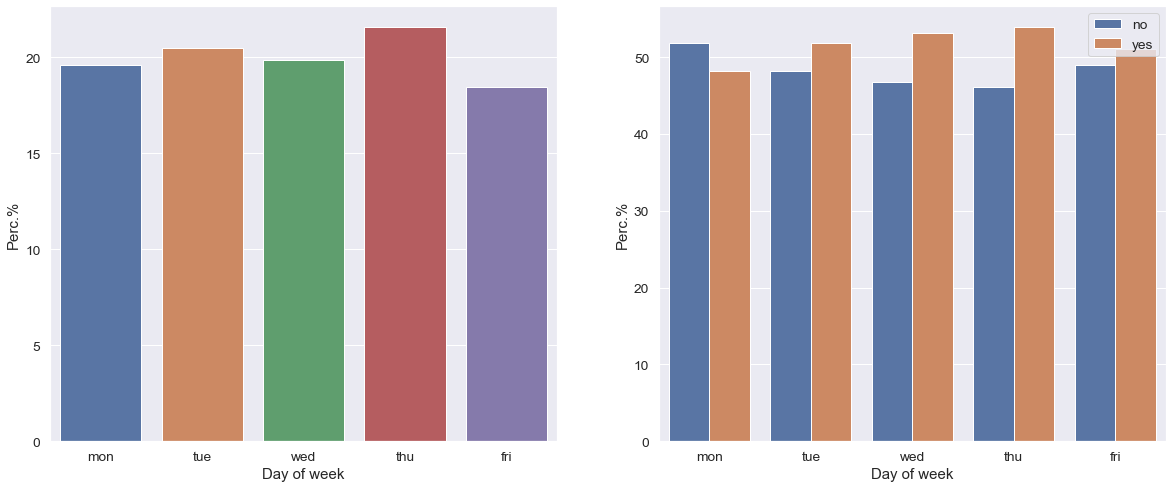

In [29]:
WeekLabels = ['mon','tue','wed','thu','fri']
M_catType = CategoricalDtype(categories = WeekLabels, ordered = True)
data['day_of_week']= data['day_of_week'].astype(M_catType)

day= (data['day_of_week'].value_counts(normalize=True)
                     .rename('Perc.%')
                     .mul(100)
                     .reset_index())
print(round(day,2))

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

sns.set(font_scale = 1.25)
a=sns.barplot(x='index',y='Perc.%',data=day,ax=ax1)
a.set(xlabel='Day of week')


month_y = (data.groupby(['day_of_week'])['y']
         .value_counts(normalize=True)
         .rename('Perc.%')
         .mul(100)
         .reset_index())

sns.barplot(x="day_of_week", y="Perc.%", hue="y", data=month_y,ax=ax2)
plt.xlabel('Day of week')
plt.legend(loc='upper right')

plt.show()

Variable  `Day of week ` seems not to be relevant for the success of the campaign.

#### Campaign

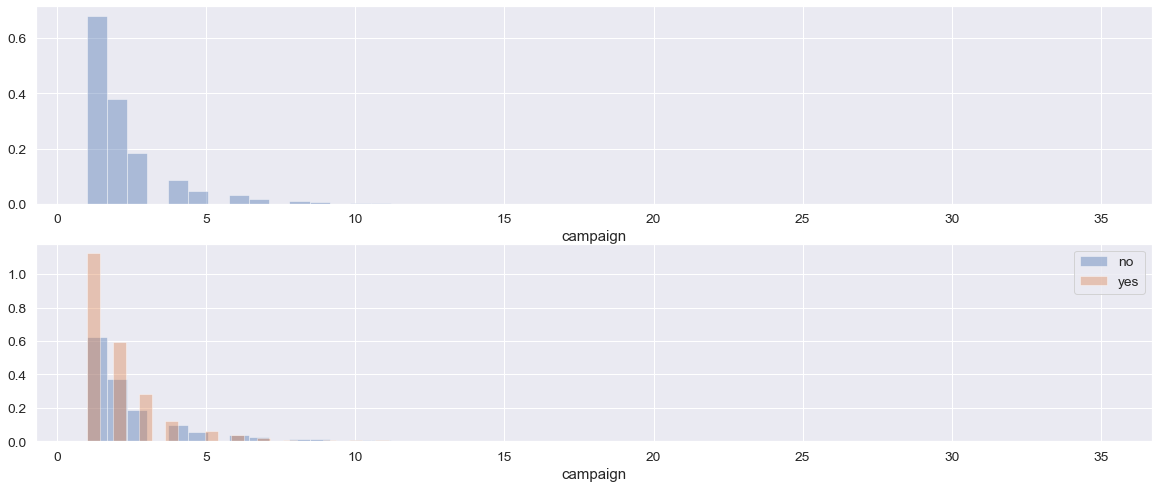

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (20,8))

sns.distplot(data['campaign'],hist=True,kde=False,rug=False,hist_kws={"density":True},ax=ax1)



sns.distplot(data[data['y']=='no']['campaign'],hist=True,label='no',kde=False,ax=ax2,hist_kws={"density":True})
sns.distplot(data[data['y']=='yes']['campaign'],hist=True,label='yes',kde=False,ax=ax2,hist_kws={"density":True})
plt.legend()
plt.show()


The distribution of the variable is concentrated in left part of the range of the possible values.
People that purchased the banking products tend to have lower values of `campaign` than who don't purchase.
We suppose that this variable could be the number of contacts during this campaign.

#### Contact

       index  Perc.%
0   cellular   71.85
1  telephone   28.15


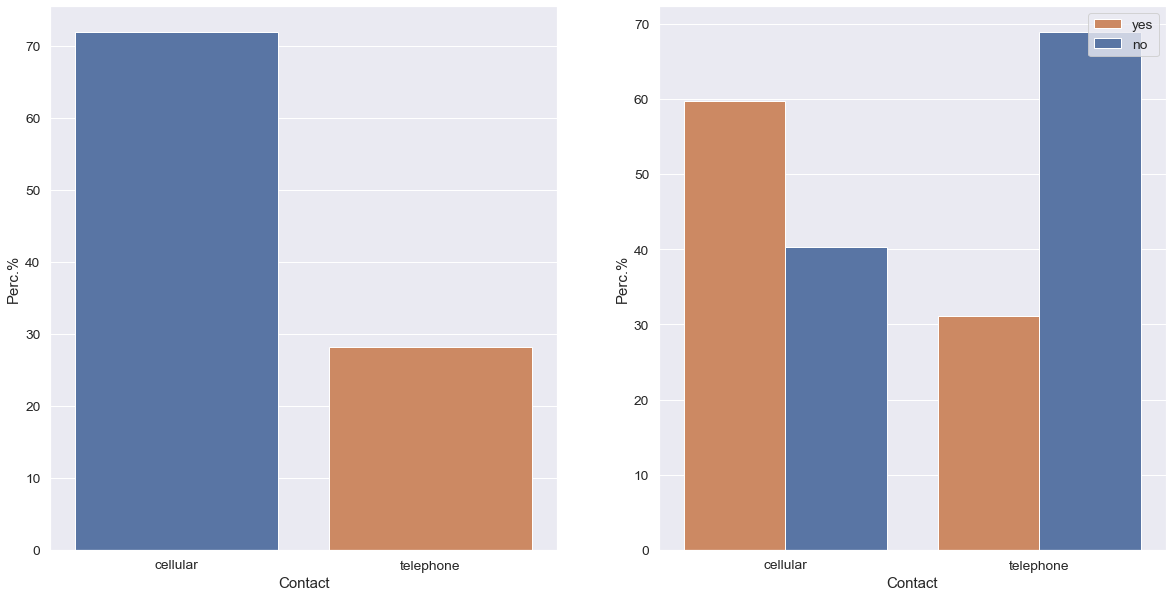

In [31]:
contact= (data['contact'].value_counts(normalize=True)
                     .rename('Perc.%')
                     .mul(100)
                     .reset_index())
print(round(contact,2))

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))

sns.set(font_scale = 1.25)
a=sns.barplot(x='index',y='Perc.%',data=contact,ax=ax1)
a.set(xlabel='Contact')


contact_y = (data.groupby(['contact'])['y']
         .value_counts(normalize=True)
         .rename('Perc.%')
         .mul(100)
         .reset_index())

sns.barplot(x="contact", y="Perc.%", hue="y", data=contact_y,ax=ax2,palette=palette)
plt.xlabel('Contact')
plt.legend(loc='upper right')

plt.show()

The favourite tool of communication is the cellular.<br>
Among people who use this medium, the number of 'yes' is higher than the number of 'no'.<br>


### 1.2.5 Focus: variables' anomalies

From the previous analysis we have found out that there are some issues regarding the behaviour of certain variables. <br>
These problems could create difficulties in the comprehension of the data and in the future application of machine learning techniques.

#### 1.2.5.1 Pdays and the "999 problem"

As you have seen before, 999 is the most recurrent value for the numerical variable `pdays`. <br>
Despite this, it is an anomalous number compared to the others.
Considering 999 days from the last contact would mean that about 3 years have passed since the last time the customer was contacted. We therefore decided to treat 999 as *'not recently contacted'* for this reason.
Given the fact that other values are in range of a month, the variable will be reparametrized as follow: 
- 1 week
- 2 weeks
- within month
- not recently contacted

This reparametrization will be make in the next report.


#### 1.2.5.2 Unknown issue

From the EDA we have noticed that six variables have an *'unknown'* mode resembling NA's. <br>
This type of modality is not so present in the dataset, but it could affect the integrity of the information contained in the dataframe. We will see better this aspect later. <br>
Moreover, there is a variable, `default`, that have only *No* and *Unknown* as modalities; for the lack of the informative power of this variable, it is recommended to cut off it from the dataset. 


In [34]:
d_unk=pd.DataFrame()
for i in range(data.shape[1]):
    #print(i)
    d_unk=d_unk.append(data[data.iloc[:,i]=='unknown'])
    
d_unk.drop_duplicates(subset='ID',inplace=True)
print('Number of observations with unknown value:',len(d_unk))

unk_freq=dict()
for i in d_unk.columns:
    #print(i)
    unk_freq[i]=round(sum(d_unk.loc[:,i]=='unknown')/len(data),4)

unk_freq 

C:\Users\ANDREA\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Number of observations with unknown value: 1977


{'ID': 0.0,
 'age': 0.0,
 'job': 0.0084,
 'marital': 0.0023,
 'education': 0.0473,
 'default': 0.1607,
 'housing': 0.0233,
 'loan': 0.0233,
 'contact': 0.0,
 'month': 0.0,
 'day_of_week': 0.0,
 'campaign': 0.0,
 'pdays': 0.0,
 'previous': 0.0,
 'poutcome': 0.0,
 'emp.var.rate': 0.0,
 'cons.price.idx': 0.0,
 'cons.conf.idx': 0.0,
 'euribor3m': 0.0,
 'nr.employed': 0.0,
 'y': 0.0}

### 1.2.6 Variables interactions

The first canonical step to detect the possible relationship among the variables is to compute the correlations on the numerical features.

In [35]:
data.set_index('ID',inplace=True)

In [36]:
data.corr()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.006898,-0.063016,0.059643,-0.049016,-0.012168,0.131616,-0.047591,-0.076856
campaign,0.006898,1.000000,0.091557,-0.099600,0.198615,0.132378,-0.027347,0.185947,0.188014
pdays,-0.063016,0.091557,1.000000,-0.704324,0.331175,0.034662,-0.155290,0.383799,0.469338
previous,0.059643,-0.099600,-0.704324,1.000000,-0.379898,-0.057537,0.073190,-0.446268,-0.520008
emp.var.rate,-0.049016,0.198615,0.331175,-0.379898,1.000000,0.718131,-0.070302,0.957783,0.866726
cons.price.idx,-0.012168,0.132378,0.034662,-0.057537,0.718131,1.000000,-0.168919,0.566373,0.342942
cons.conf.idx,0.131616,-0.027347,-0.155290,0.073190,-0.070302,-0.168919,1.000000,0.038280,-0.090919
euribor3m,-0.047591,0.185947,0.383799,-0.446268,0.957783,0.566373,0.038280,1.000000,0.940593
nr.employed,-0.076856,0.188014,0.469338,-0.520008,0.866726,0.342942,-0.090919,0.940593,1.000000


From the table, it is possible to enlighten major correlations:

In [37]:
data[['emp.var.rate','euribor3m','cons.price.idx','nr.employed']].corr()

,emp.var.rate,euribor3m,cons.price.idx,nr.employed
emp.var.rate,1.000000,0.957783,0.718131,0.866726
euribor3m,0.957783,1.000000,0.566373,0.940593
cons.price.idx,0.718131,0.566373,1.000000,0.342942
nr.employed,0.866726,0.940593,0.342942,1.000000


These correlations are all positive and concern the socio-economic context.

Another important step is to investigate the relationships among variables according to the initial classification we made (the four groups). <br>
It can be useful to understand how the campaign was implemented and which factors influenced this process.

 #### 1.2.6.1 Current campaign interactions

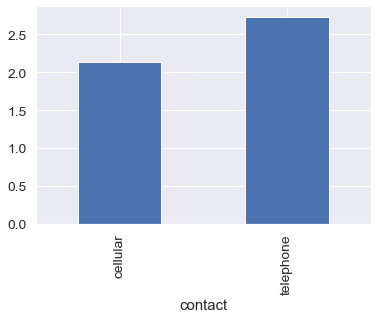

In [38]:
data.groupby('contact')['campaign'].mean().plot.bar()
plt.show()

The average level of `campaign` by contacts is mostly via telephone, but previously we had noticed that the mobile was the best way to ensure the success of the campaign.

 #### 1.2.6.2 Previous campaign interactions


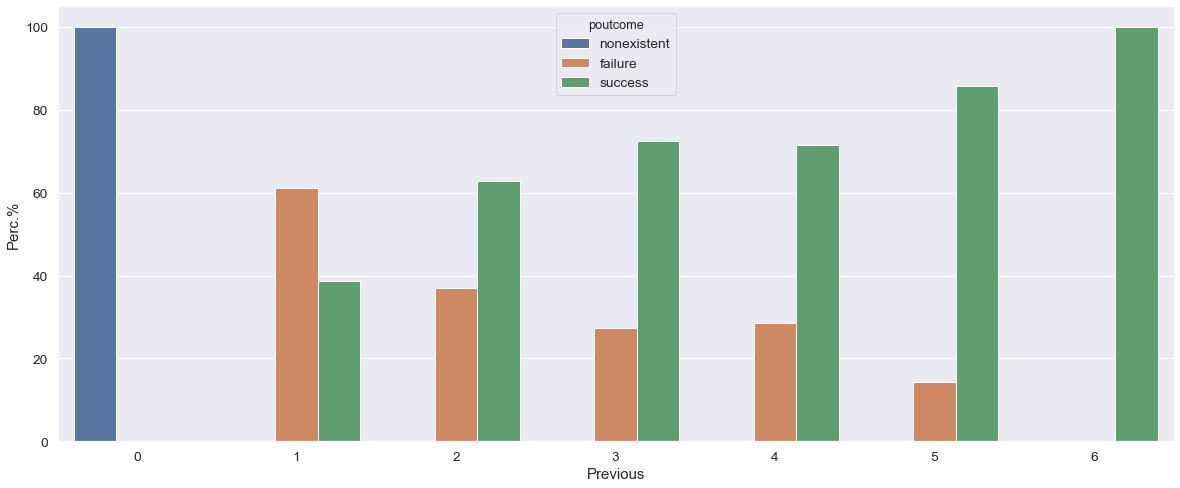

In [39]:
pout_y = (data.groupby(['previous'])['poutcome']
         .value_counts(normalize=True)
         .rename('Perc.%')
         .mul(100)
         .reset_index())
fig=plt.subplots(figsize=(20,8))
sns.barplot(x="previous", y="Perc.%", hue="poutcome", data=pout_y)
plt.xlabel('Previous')


plt.show()

All the people that was not involved in previous campaigns are correctly classified with the *non existent* outcome. <br>
Furthermore, it can be observed that previous campaigns are quite effective: in fact, increasing the number of previous contacts leads to a growing percentages of sucess, too.

#### 1.2.6.3 Client vs current campaign information : Is the number of contacts that a customer has linked to his characteristics?

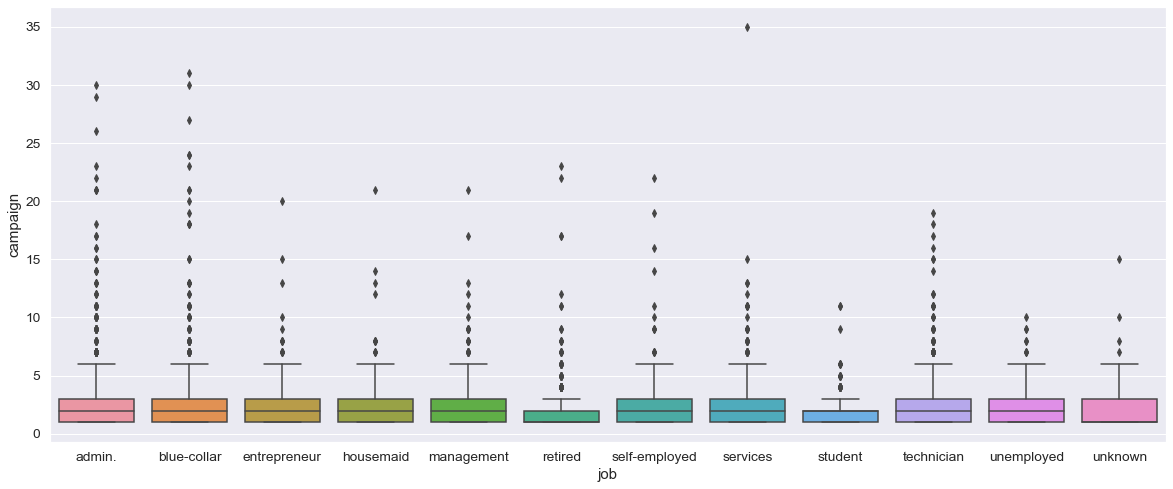

In [40]:
fig=plt.subplots(figsize=(20,8))
sns.boxplot(x='job',y='campaign',data=data)
plt.show()

As it can be witnessed, the number of contacts is not influenced by the job. This situation is equals for almost all the client's characteristic (e.g marital or age). <br> Therefore, we can say that personal information don't influence the number of contacts.

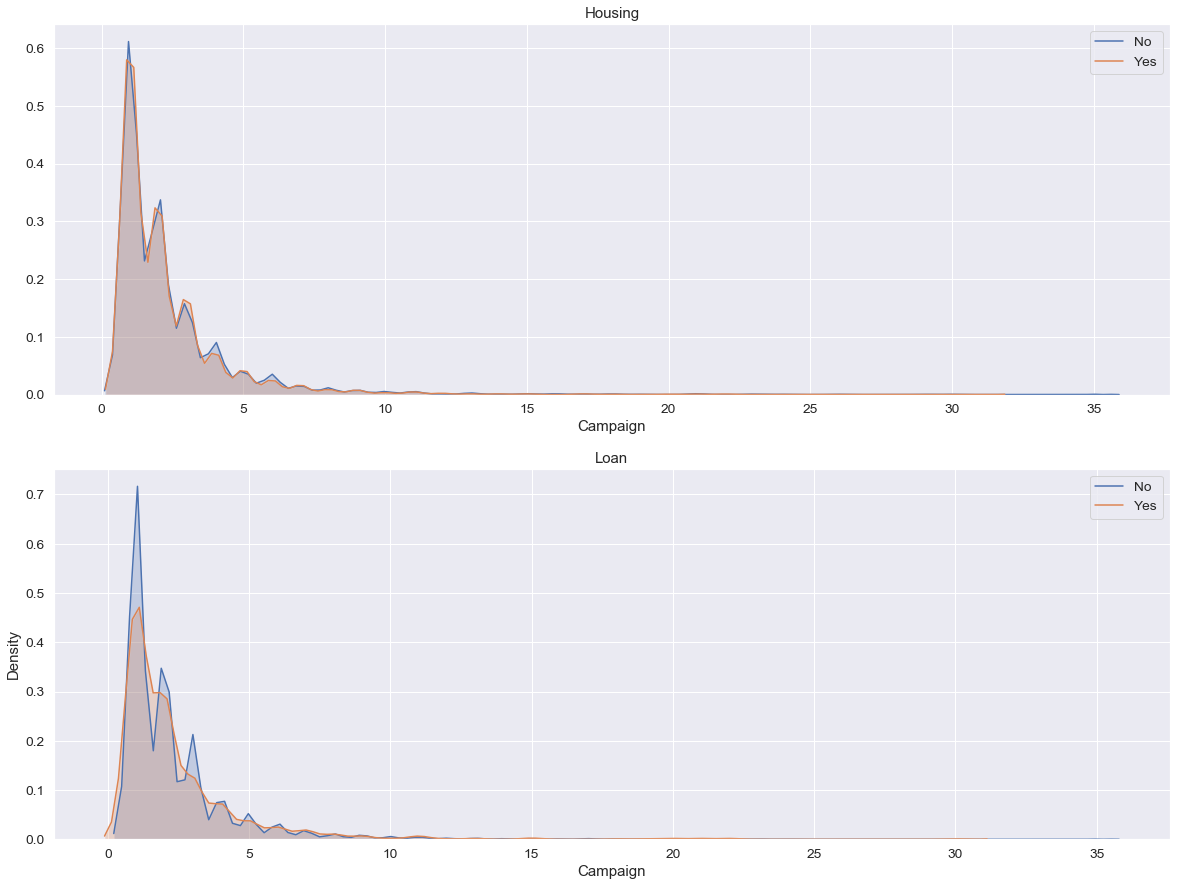

In [41]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (20,15))
sns.kdeplot(data[data['housing']=='no']['campaign'],shade=True,label='No',ax=ax1)
sns.kdeplot(data[data['housing']=='yes']['campaign'],shade=True,label='Yes',ax=ax1)
ax1.set_xlabel('Campaign')
plt.ylabel('Density')
ax1.set_title('Housing')


sns.kdeplot(data[data['loan']=='no']['campaign'],shade=True,label='No',ax=ax2)
sns.kdeplot(data[data['loan']=='yes']['campaign'],shade=True,label='Yes',ax=ax2)
plt.xlabel('Campaign')
plt.ylabel('Density')
ax2.set_title('Loan')


plt.show()

People who have already held financial products (loan and housing) in place, seem to have the same number of contacts with respect to people who haven't had a loan or a housing yet. <br> Despite that, we further notice that having a loan, slightly increase the possibility not to be contacted. 

#### 1.2.6.4 Previous vs current campaign information : Does the success of the previous campaign and customer participation affect the participation and success of the current campaign?

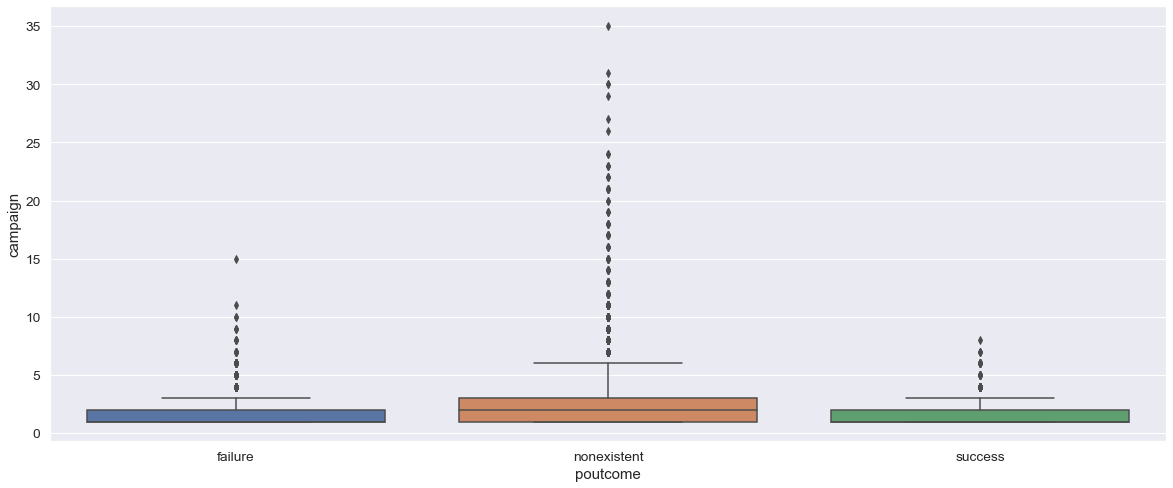

In [42]:
fig=plt.subplots(figsize=(20,8))
sns.boxplot('poutcome','campaign',data=data)
plt.show()

In this marketing campaign, the number of contacts of a client tends to be higher for those who were not involved in the previous campaign: in the *not existent* group there are lots of great values of campaign, that underlines how the actual campaign want to increase the customer base.

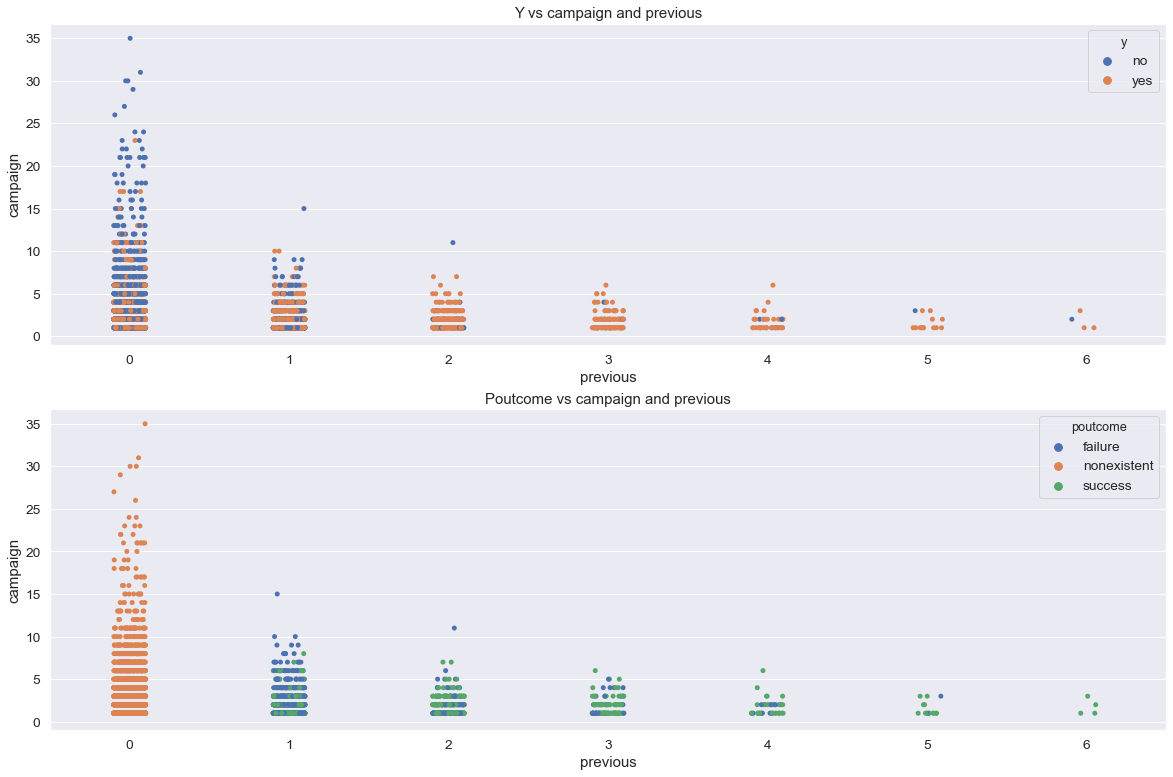

In [44]:
fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (20,13))
sns.stripplot(x="previous", y="campaign",hue='y', data=data,ax=ax1)
sns.stripplot(x="previous", y="campaign",hue='poutcome', data=data,ax=ax2)
ax1.set_title('Y vs campaign and previous')
ax2.set_title('Poutcome vs campaign and previous')
plt.show()

People that were contacted in the past for a campaign, tend to be contacted less for the current campaign.<br>
Despite that, these people (previously contacted) are more willing to purchase banking products.<br>
Moreover, in the second plot, you can see that the previous campaigns are more effective than the current: increasing the number of previous contacts increase the number of success of former campaign.

### 1.3 Final considerations

Our analysis points out that:
- There are four groups of variables in our dataset;
- Variables that have a significant relationship with y are  `job `,  `education `,  `previous `,  `poutcome `,  `campaign `.
- Socio-economic variables show an opposite behaviour in relation with y w.r.t the common sense (e.g. the increase of the number of purchase combined with a decrease in the employment level). This can be due to a disregard of the socio-economic situation made by the bank and the customers.
- There are anomalies in the dataset as the presence of unknown and the modality 999 in  `pdays`. We decide to reparametrize `pdays` and then in next chapter to impute the unknown.
- Previous campaigns tend to be more effective than the current. Althought the current tends to increase the customer base of the bank.
